In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
test_vox = np.zeros((7, 7, 7))
for i in [0, 6]:
    test_vox[i, 0, :] = 1
    test_vox[i, 6, :] = 1
    test_vox[i, :, 0] = 1
    test_vox[i, :, 6] = 1
for i in [6]:
    test_vox[0, i, :] = 1
    test_vox[6, i, :] = 1
    test_vox[:, i, 0] = 1
    test_vox[:, i, 6] = 1
display(test_vox.sum())
test_vox

58.0

array([[[1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
      

In [3]:
def show_slices(vox, axis):
    num_imgs = vox.shape[0]
    fig, axes = plt.subplots(1, num_imgs, figsize=(2*num_imgs, 2))
    for i, ax in enumerate(axes):
        #ax.imshow(vox[i, :, :], cmap="binary", interpolation="none")
        ax.imshow(np.take(vox, i, axis=axis), cmap="binary", interpolation="none")
        ax.tick_params(axis="both", which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.set_xticks(np.linspace(-0.5, num_imgs - 0.5, num_imgs + 1))
        ax.set_yticks(np.linspace(-0.5, num_imgs - 0.5, num_imgs + 1))
        ax.grid(visible=True)
    return fig

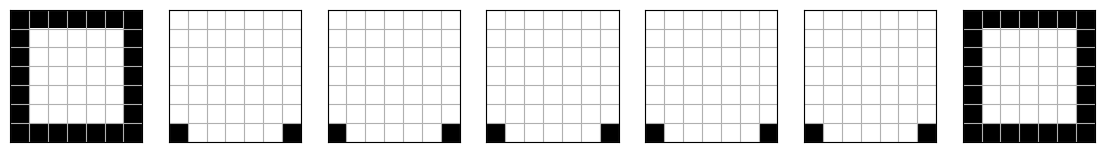

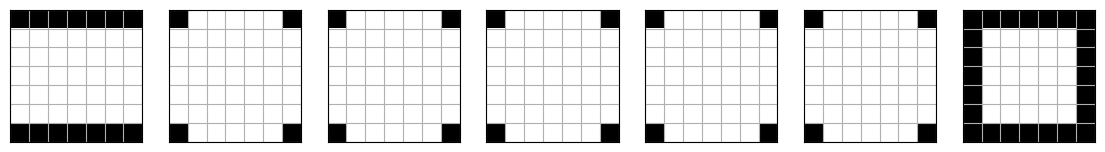

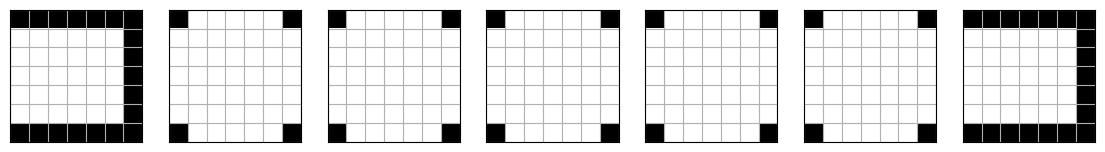

In [4]:
show_slices(test_vox, 0)
show_slices(test_vox, 1)
show_slices(test_vox, 2)
pass

In [5]:
def show_projections(vox):
    num = vox.shape[0]
    fig, axes = plt.subplots(1, 3, figsize=(6, 2))
    for dim, ax in enumerate(axes):
        #ax.imshow(vox[i, :, :], cmap="binary", interpolation="none")
        ax.imshow(vox.max(dim), cmap="binary", interpolation="none")
        ax.tick_params(axis="both", which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
        ax.set_xticks(np.linspace(-0.5, num - 0.5, num + 1))
        ax.set_yticks(np.linspace(-0.5, num - 0.5, num + 1))
        ax.grid(visible=True)
    return fig

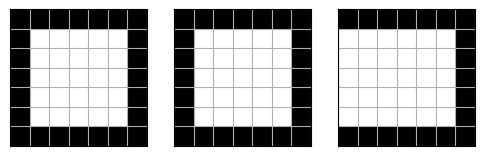

In [6]:
show_projections(test_vox)
pass

## Making a class

In [17]:
class Design:
    def __init__(self, size):
        self._vox = np.zeros((size, size, size))
        
    @property
    def size(self):
        return self._vox.shape[0]
    
    @property
    def vox(self):
        return self._vox
    
    def projection(self, axis):
        return self._vox.max(axis)
    
    def projections(self):
        for axis in range(3):
            yield self.projection(axis)
     
    def slices(self, axis):
        for i in range(self.size):
            yield np.take(self._vox, i, axis=axis)
            
    def projections_fig(self):
        fig, axes = plt.subplots(1, 3, figsize=(6, 2))
        for axis, ax in enumerate(axes):
            #ax.imshow(vox[i, :, :], cmap="binary", interpolation="none")
            ax.imshow(self.projection(axis), cmap="binary", interpolation="none")
            ax.tick_params(axis="both", which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
            ax.set_xticks(np.linspace(-0.5, self.size - 0.5, self.size + 1))
            ax.set_yticks(np.linspace(-0.5, self.size - 0.5, self.size + 1))
            ax.grid(visible=True)
        plt.close()
        return fig
    
    def slices_fig(self):
        fig, axes = plt.subplots(3, self.size, figsize=(2 * self.size, 6))
        for axis in range(3):
            for i, slc in enumerate(self.slices(axis)):
                ax = axes[axis, i]
                #ax.imshow(vox[i, :, :], cmap="binary", interpolation="none")
                ax.imshow(slc, cmap="binary", interpolation="none")
                ax.tick_params(axis="both", which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
                ax.set_xticks(np.linspace(-0.5, self.size - 0.5, self.size + 1))
                ax.set_yticks(np.linspace(-0.5, self.size - 0.5, self.size + 1))
                ax.grid(visible=True)
        plt.close()
        return fig

In [18]:
test_vox2 = Design(7)
for i in [0, 6]:
    test_vox2.vox[i, 0, :] = 1
    test_vox2.vox[i, 6, :] = 1
    test_vox2.vox[i, :, 0] = 1
    test_vox2.vox[i, :, 6] = 1
for i in [6]:
    test_vox2.vox[0, i, :] = 1
    test_vox2.vox[6, i, :] = 1
    test_vox2.vox[:, i, 0] = 1
    test_vox2.vox[:, i, 6] = 1
display(test_vox2.vox.sum())
test_vox2._vox

58.0

array([[[1., 1., 1., 1., 1., 1., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 1.]],

       [[0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
      

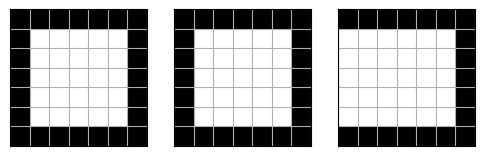

In [19]:
test_vox2.projections_fig()

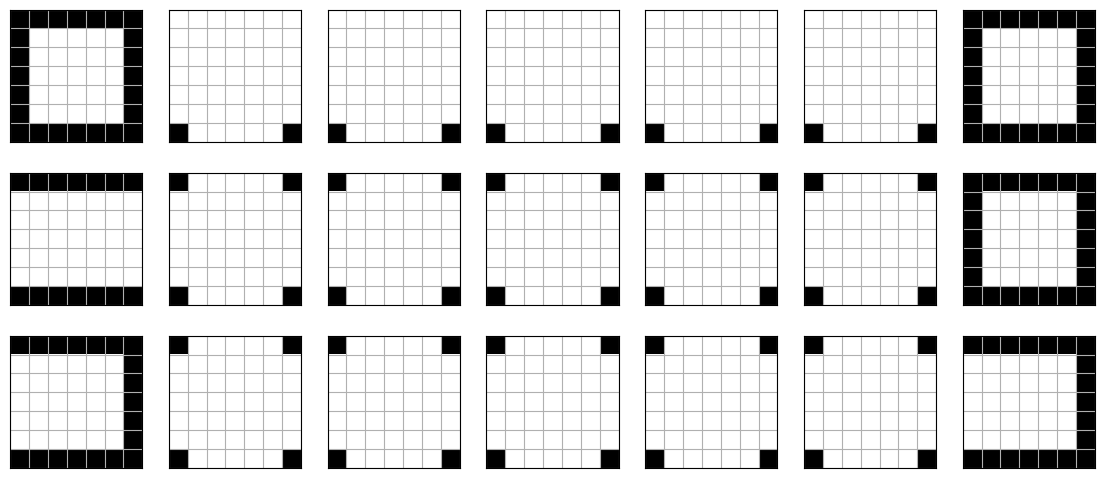

In [21]:
test_vox2.slices_fig()

In [28]:
class Goal:
    def __init__(self, size):
        self._goals = np.zeros((3, size, size))
       
    @property
    def size(self):
        return self._goals.shape[1]

    def goal(self, goal_idx):
        return self._goals[goal_idx, : , :]

    def fig(self):
        fig, axes = plt.subplots(3, 1, figsize=(2, 6))
        for goal_idx, ax in enumerate(axes):
            #ax.imshow(vox[i, :, :], cmap="binary", interpolation="none")
            ax.imshow(self._goals[goal_idx, :, :], cmap="binary", interpolation="none")
            ax.tick_params(axis="both", which="both", bottom=False, left=False, labelbottom=False, labelleft=False)
            ax.set_xticks(np.linspace(-0.5, self.size - 0.5, self.size + 1))
            ax.set_yticks(np.linspace(-0.5, self.size - 0.5, self.size + 1))
            ax.grid(visible=True)
        plt.close()
        return fig   

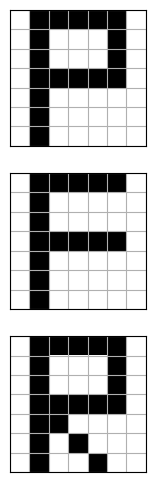

In [42]:
GOAL_0 = [
    (0, 1),
    (1, 1),
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 1),
    (6, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (3, 2),
    (3, 3),
    (3, 4),
    (3, 5),
    (1, 5),
    (2, 5),
]
GOAL_1 = [
    (0, 1),
    (1, 1),
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 1),
    (6, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (3, 2),
    (3, 3),
    (3, 4),
    (3, 5),
]
GOAL_2 = [
    (0, 1),
    (1, 1),
    (2, 1),
    (3, 1),
    (4, 1),
    (5, 1),
    (6, 1),
    (0, 2),
    (0, 3),
    (0, 4),
    (0, 5),
    (3, 2),
    (3, 3),
    (3, 4),
    (3, 5),
    (1, 5),
    (2, 5),
    (4, 2),
    (5, 3),
    (6, 4),
]
test_goal = Goal(7)
#test_goal.goal(0)[3, 2] = 1
for x in GOAL_0:
    test_goal.goal(0)[x] = 1
for x in GOAL_1:
    test_goal.goal(1)[x] = 1
for x in GOAL_2:
    test_goal.goal(2)[x] = 1
test_goal.fig()